In [ ]:
import numpy as np
import muon as mu
import scanpy as sc
import anndata as ad
import os
import random
import torch.nn.functional as F
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from create_datasets.preprocessing import create_mdata, set_random_seed #
from models import scSpecies
import torch
import json
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.stats import entropy

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

set_random_seed(1234)
np.random.seed(1234)

path = os.path.abspath('').replace('\\', '/')+'/'
data_path = path+'dataset/'
save_path = os.path.abspath('').replace('\\', '/')+'/results/'

In [2]:
import numpy as np
import muon as mu
import scanpy as sc
import os
import pandas as pd
import anndata as ad
#import textalloc as ta
import glasbey
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

%load_ext autoreload
%autoreload 2



def return_palette(names):
    
    known_cell_types = {
        'B Cells': ('#964b00', 'Lymphoid Cells', 'B cell lineage'),
        'B/Plasma': ('#6F4E37', 'Lymphoid Cells', 'B cell lineage'),
        'Plasma': ('#c19a6b', 'Lymphoid Cells', 'B cell lineage'),

        'Naive CD8+ T': ('#A8E4A0', 'Lymphoid Cells', 'Cytotoxic T Cells'),        
        'Circ. Eff. Memory T': ('#98FB98', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'Cytotoxic CD8+': ('#A7F432', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'RM CD8+ T Cells': ('#D0F0C0', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'RM CD8+ T cells': ('#D0F0C0', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'CD8 Eff. Memory T': ('#D1FFBD', 'Lymphoid Cells', 'Cytotoxic T Cells'),        
        'Gamma-Delta T': ('#9acd32', 'Lymphoid Cells', 'Specialized T Cells'),
        'T Cells': ('#4CBB17', 'Lymphoid Cells', 'T Cells'),
        'T Cells 1': ('#08A04B', 'Lymphoid Cells', 'T Cells'),
        'T Cells 2': ('#227442', 'Lymphoid Cells', 'T Cells'),
        'T Cells 3': ('#254117', 'Lymphoid Cells', 'T Cells'),
        'Naive CD4+ T': ('#48A860', 'Lymphoid Cells', 'T helper Cells'),
        'CD4+ T helper': ('#50a88b', 'Lymphoid Cells', 'T helper Cells'),
        'Naive/CM CD4+ T': ('#2E8B57', 'Lymphoid Cells', 'T helper Cells'),
        'Th 17': ('#00A86B', 'Lymphoid Cells', 'T helper Cells'),
        'Th 1': ('#50C878', 'Lymphoid Cells', 'T helper Cells'),
        'CD4+ KLRB1 Th': ('#74C365', 'Lymphoid Cells', 'T helper Cells'),
        'Regulatory T': ('#0B6623',	'Lymphoid Cells', 'T helper Cells'),
        'Circ. NK': ('#8F9779', 'Lymphoid Cells', 'NK/NKT'),
        'Tissue Resident NK': ('#708238', 'Lymphoid Cells', 'NK/NKT'),
        'NK Cells': ('#568203', 'Lymphoid Cells', 'NK/NKT'),
        'NK/NKT Cells': ('#839B17', 'Lymphoid Cells', 'NK/NKT'),
        'NKT Cells': ('#043927', 'Lymphoid Cells' , 'NK/NKT'),     
         
        
        'ILCs': ('#7fff00', 'Lymphoid Cells', 'Innate lymphoid Cells'),
        'Prol. TAM': ('#93FFE8', 'Myeloid Cells', 'Tumor associated macrophages'),
        
        'Mg-TAM': ('#DA2C43', 'Myeloid Cells', 'Mg-TAM'),
        'Hypoxic Mg-TAM': ('#A50B5E', 'Myeloid Cells', 'Mg-TAM'),
        'IFN Mg-TAM': ('#F64A8A', 'Myeloid Cells', 'Mg-TAM'),
        'Phago/Lipid Mg-TAM': ('#F987C5', 'Myeloid Cells', 'Mg-TAM'),
        
        'Mo-TAM': ('#00637C', 'Myeloid Cells', 'Mo-TAM'),
        'IFN Mo-TAM': ('#005F5F', 'Myeloid Cells', 'Mo-TAM'),
        'Lipid Mo-TAM': ('#008794', 'Myeloid Cells', 'Mo-TAM'),
        'Hypoxic Mo-TAM': ('#5F9EA0', 'Myeloid Cells', 'Mo-TAM'),
        'SEPP1+ Mo-TAM': ('#80fdff', 'Myeloid Cells', 'Mo-TAM'),
        'Transitory Mo-TAM': ('#00d9dc', 'Myeloid Cells', 'Mo-TAM'),

        'Macrophages 1': ('#151B54', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 2': ('#191970', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 3': ('#0000A5', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 4': ('#0000CD', 'Myeloid Cells', 'Macrophages'),
        'Bile-duct LAMs': ('#5865F2', 'Myeloid Cells', 'Macrophages'),
        'MoMac1': ('#0020C2', 'Myeloid Cells', 'Macrophages'),
        'MoMac2': ('#0041C2', 'Myeloid Cells', 'Macrophages'),
        'Peritoneal Macs': ('#6960EC',  'Myeloid Cells', 'Macrophages'),
        'CV/Capsule': ('#1D2951', 'Myeloid Cells', 'Macrophages'),        
        'CV/Capsule Cd207+ Macs': ('#1D2951', 'Myeloid Cells', 'Macrophages'),
        'Macrophages': ('#101D6B', 'Myeloid Cells', 'Macrophages'),
        'immLAMs': ('#000080', 'Myeloid Cells', 'Macrophages'),
        'matLAMs': ('#1035AC', 'Myeloid Cells', 'Macrophages'),
        'Monocytes 1': ('#1974D2', 'Myeloid Cells', 'Mono/mono derived'),
        'Monocytes 2': ('#0909FF', 'Myeloid Cells', 'Mono/mono derived'),   
        'Mono/mono-derived': ('#4f86f7', 'Myeloid Cells', 'Mono/mono derived'), 
        'Trans. Monocytes': ('#6495ED', 'Myeloid Cells', 'Mono/mono derived'),
        'Trans. Monocytes 1': ('#b5d7fd', 'Myeloid Cells', 'Mono/mono derived'),               
        'Trans. Monocytes 2': ('#82EEFD', 'Myeloid Cells', 'Mono/mono derived'),
        'Monocytes': ('#87CDEE', 'Myeloid Cells', 'Mono/mono derived'),
        'Pat. Monocytes': ('#008ECC', 'Myeloid Cells', 'Mono/mono derived'),
        'Pre-moKCs and moKCs': ('#38ACEC', 'Myeloid Cells', 'Mono/mono derived'),
        'KCs': ("#5ba3bb", 'Myeloid Cells', 'Mono/mono derived'),
        
        'Basophils': ('#000000', 'Myeloid Cells', 'Granulocytes'),
        'Mast Cells': ('#00CC99', 'Myeloid Cells', 'Mast Cells'),
        'Neutrophils': ('#8c8784', 'Myeloid Cells', 'Granulocytes'),
        'ASDC': ('#483D8B', 'Myeloid Cells', 'Dendritic Cells'),
        'DCs': ('#80008B', 'Myeloid Cells', 'Dendritic Cells'),
        'DCs 3': ('#342D7E', 'Myeloid Cells', 'Dendritic Cells'),
        'Mig. DCs': ('#8f00ff', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs': ('#80008B', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs 1': ('#81007F', 'Myeloid Cells', 'Dendritic Cells'),
        'Prol. cDCs 1': ('#B041FF', 'Myeloid Cells', 'Dendritic Cells'),
        'pre-DC': ('#36013F', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs 2': ('#6F2DA8', 'Myeloid Cells', 'Dendritic Cells'),
        'Prol. cDCs 2': ('#4B0082', 'Myeloid Cells', 'Dendritic Cells'),
        'pDCs': ('#D891EF', 'Myeloid Cells', 'Dendritic Cells'),
        'Endothelials': ('#ffbf00', 'CD45- Cells', 'Endothelials'),
        'Endothelials A1': ('#D2691E', 'CD45- Cells', 'Endothelials'),
        'Endothelials A2': ('#CC6600', 'CD45- Cells', 'Endothelials'), 
        'Endothelials M': ('#E66C2C', 'CD45- Cells', 'Endothelials'),
        'Endothelials S1': ('#FF6700', 'CD45- Cells', 'Endothelials'),
        'Endothelials S2': ('#FF5F1F', 'CD45- Cells', 'Endothelials'),
        'Endothelials S3': ('#FE632A', 'CD45- Cells', 'Endothelials'),
        'Endothelials V': ('#F87217', 'CD45- Cells', 'Endothelials'),
        'Central Vein ECs': ('#fcc200', 'CD45- Cells', 'Endothelials'),
        'LSECs': ('#ffa700', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs': ('#FCE205', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs 1': ('#C35817', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs 2': ('#C04000', 'CD45- Cells', 'Endothelials'),
        'Portal Vein ECs': ('#ffd700', 'CD45- Cells', 'Endothelials'),
        'Female Epithelials': ('#F433FF', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Endometrium': ('#FF8C00', 'CD45- Cells', 'Epithelial/epithelial-like'),        
        'Female Epithelials AV': ('#FF77FF', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Female Epithelials HS': ('#FF00FF', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials': ('#A74AC7', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials 1': ('#B048B5', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials 2': ('#B666D2', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Male Epithelials 3': ('#7E587E', 'CD45- Cells', 'Epithelial/epithelial-like'), 
        'Mesothelial Cells': ('#E0115F', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Mesothelial 1': ('#FF4500', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Mesothelial 2': ('#E55451', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Mesothelial 3': ('#E55B3C', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Hepatocytes': ('#ff0090', 'CD45- Cells', 'Epithelial/epithelial-like'),        
        'Cholangiocytes': ('#c90016', 'CD45- Cells', 'Epithelial/epithelial-like'),
        'Capsule Fibroblasts': ('#cf1020', 'CD45- Cells', 'Structural/connective tissue'),
        'Fibroblasts': ('#ff3800', 'CD45- Cells', 'Structural/connective tissue'),
        'Fibroblast 1': ('#f08080', 'CD45- Cells', 'Structural/connective tissue'),
        'Fibroblast 2': ('#ff4500', 'CD45- Cells', 'Structural/connective tissue'),
        'Stromal':  ('#ff4500', 'CD45- Cells', 'Structural/connective tissue'),
        'Mammary Fibroblasts': ('#CC338B', 'CD45- Cells', 'Structural/connective tissue'),        
        'Stellate Cells': ('#ff033e', 'CD45- Cells', 'Structural/connective tissue'),        
        'Adipocytes': ('#FF2400', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 1': ('#FFFF33', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 2': ('#FFEF00', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 3': ('#FAF884', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 4': ('#FFE87C', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 5': ('#FFDB58', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 6': ('#FFDF00', 'CD45- Cells', 'Structural/connective tissue'),
        'Adipocytes 7': ('#F9DB24', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes': ('#C60615', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 1': ('#FBB917', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 2': ('#FDBD01', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 3': ('#FBB117', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 4': ('#FFAE42', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 5': ('#F2BB66', 'CD45- Cells', 'Structural/connective tissue'),
        'Preadipocytes 6': ('#FFCE44', 'CD45- Cells', 'Structural/connective tissue'),
        'Pericytes': ('#FE5BAC', 'CD45- Cells', 'Structural/connective tissue'),
        'Smooth Muscle Cells': ('#B5338A', 'CD45- Cells', 'Structural/connective tissue'),
        'Myo Epithelials': ('#98AFC7', 'CD45- Cells', 'Structural/connective tissue'),
        'Platelets': ('#837E7C', 'CD45- Cells', 'Platelets'),
    }

    name_list = np.unique(names)
    lenght = 10 + len(name_list)
    colors = glasbey.extend_palette("tab10", palette_size=lenght)

    palette = {}

    j=0
    for name in name_list:       
        if name in known_cell_types.keys():
            palette[name] = known_cell_types[name]#[0]
        else: 
            print('\nAssingning color to unknown cell type: '+name)
            palette[name] = (colors[j], )
            j+=1
            
    return palette


def eval_model(model, eval_key, b_s=128):

    if eval_key == 'target':
        dataset_key = model.target_dataset_key
        decoder = model.target_decoder
        encoder_inner =  model.target_encoder_inner
        lib_encoder = model.target_lib_encoder
        encoder_outer = model.target_encoder_outer  

    if eval_key == 'context':
        dataset_key = model.context_dataset_key
        decoder = model.context_decoder
        encoder_inner =  model.target_encoder_inner
        lib_encoder = model.context_lib_encoder
        encoder_outer = model.context_encoder_outer      
        
        
    n_obs = model.mdata.mod[dataset_key].n_obs

    steps_per_epoch = int(np.ceil(n_obs / b_s))

    data_counts = torch.from_numpy(model.mdata.mod[dataset_key].X.toarray())

    encoder_outer.eval()
    lib_encoder.eval()        
    decoder.eval()
    encoder_inner.eval()

    encoder_outer.cpu()
    lib_encoder.cpu()        
    decoder.cpu()
    encoder_inner.cpu()

    interm = {i: [] for i in range(len(encoder_outer.model) + len(encoder_inner.model))}
    interm['mu'] = []

    likeli_list = []
    rec_list = []
    norm_list = []
    l_list = []
    l_mu_list = []
    l_log_sig_list = []

    def process_layer(layer, input_tensor):
        return layer(input_tensor)

    with torch.no_grad():
        for step in range(steps_per_epoch):
            #print(step) 
            start_idx = step * b_s
            end_idx = min((step + 1) * b_s, data_counts.size(0))
            batch_adata = model.mdata.mod[dataset_key][start_idx:end_idx]

            data_batch = data_counts[start_idx:end_idx]
            label_batch = torch.from_numpy(batch_adata.obsm['batch_label_enc'])

            x = torch.cat((data_batch, label_batch), dim=-1)  
            for i, layer in enumerate(encoder_outer.model):
                x = process_layer(layer, x)
                interm[i].append(x) 

            for j, layer in enumerate(encoder_inner.model):
                x = process_layer(layer, x)
                interm[len(encoder_outer.model)+j].append(x) 

            mu = encoder_inner.mu(x)
            interm['mu'].append(mu) 
            
            inter = encoder_outer(data_batch, label_batch)
            mu, log_sig = encoder_inner.encode(inter)                 
            z = mu + log_sig.exp() * torch.rand_like(log_sig)
            l_mu, l_log_sig = lib_encoder.encode(data_batch, label_batch)   
            l = torch.exp(l_mu + l_log_sig.exp() * torch.rand_like(l_log_sig))

            alpha, rho, pi_nlogit = decoder.decode(z, label_batch)   
            eps = 1e-7        
            alpha = torch.clamp(alpha, min=eps)
            rho = torch.clamp(rho, min=eps, max=1 - eps)
            pi = torch.sigmoid(-pi_nlogit)  
            mu = rho * l 

            total_count = alpha
            probs = torch.clamp(mu / (mu + alpha), min=eps, max=1 - eps)

            zero_mask = torch.bernoulli(pi.expand(1, *pi.shape))
            nb_dist = torch.distributions.NegativeBinomial(total_count=total_count, probs=probs)
            samples = nb_dist.sample((1,)) 
            samples = torch.where(zero_mask.bool(), torch.zeros_like(samples), samples).squeeze()

            log_alpha_mu = torch.log(alpha + mu)
            log_likelihood = torch.where(data_batch < eps,
                F.softplus(pi_nlogit + alpha * (torch.log(alpha) - log_alpha_mu)) - F.softplus(pi_nlogit),
                - F.softplus(pi_nlogit) + pi_nlogit 
                + alpha * (torch.log(alpha) - log_alpha_mu) + data_batch * (torch.log(mu) - log_alpha_mu) 
                + torch.lgamma(data_batch + alpha) - torch.lgamma(alpha) - torch.lgamma(1.0 + data_batch))

            likeli_list.append(log_likelihood.sum(-1))        
            rec_list.append(samples.squeeze())
            norm_list.append(rho.squeeze())
            l_list.append(l)
            l_mu_list.append(l_mu)
            l_log_sig_list.append(l_log_sig)
            
        likeli_list = torch.concatenate(likeli_list)  
        rec_list = torch.concatenate(rec_list)
        norm_list = torch.concatenate(norm_list)
        l_list = torch.concatenate(l_list)
        l_mu_list = torch.concatenate(l_mu_list)
        l_log_sig_list = torch.concatenate(l_log_sig_list)
        
    interm['data'] = sc.AnnData(model.mdata.mod[dataset_key].X)
        
    return interm, likeli_list, rec_list, norm_list, l_list, l_mu_list, l_log_sig_list, data_counts


def calc_leiden(interm, keys):

    for key in keys:
        if key != 'data':
            interm[key] = sc.AnnData(np.array(torch.cat(interm[key])))

        sc.pp.neighbors(interm[key], use_rep='X')
        
        sc.tl.leiden(interm[key])
        interm[key].obs['leiden_clusters'] = interm[key].obs['leiden']
        
        sc.tl.umap(interm[key])

    return interm  

def compute_batch_mixing_score(
    adata, 
    n_permutations=100,      
    random_state=1234    
):
    
    rng = np.random.default_rng(random_state)

    connectivities = adata.obsp["connectivities"]
    if not pd.api.types.is_categorical_dtype(adata.obs["batch"]):
        adata.obs["batch"] = adata.obs["batch"].astype("category")
    batch_categories = adata.obs["batch"].cat.categories
    n_categories = len(batch_categories)


    batch_array = adata.obs["batch"].cat.codes.values 

    n_cells = adata.n_obs
    one_hot = np.zeros((n_cells, n_categories), dtype=np.float32)
    one_hot[np.arange(n_cells), batch_array] = 1.0

    neighbor_counts = connectivities.dot(one_hot)

    row_sums = neighbor_counts.sum(axis=1, keepdims=True)

    fraction = np.divide(
        neighbor_counts,
        row_sums,
        out=np.zeros_like(neighbor_counts),
        where=(row_sums != 0)
    )

    shannon_per_cell = entropy(fraction.T, base=np.e) 
    observed_score = shannon_per_cell.mean()

    random_scores = []
    batch_labels = adata.obs["batch"].values

    for _ in range(n_permutations):
        permuted = rng.permutation(batch_labels)
        perm_series = pd.Categorical(permuted, categories=batch_categories)
        perm_codes = perm_series.codes
        one_hot_perm = np.zeros((n_cells, n_categories), dtype=np.float32)
        one_hot_perm[np.arange(n_cells), perm_codes] = 1.0

        neighbor_counts_perm = connectivities.dot(one_hot_perm)
        row_sums_perm = neighbor_counts_perm.sum(axis=1, keepdims=True)
        fraction_perm = np.divide(
            neighbor_counts_perm,
            row_sums_perm,
            out=np.zeros_like(neighbor_counts_perm),
            where=(row_sums_perm != 0)
        )

        shannon_perm = entropy(fraction_perm.T, base=np.e) 
        random_scores.append(shannon_perm.mean())

    random_scores = np.array(random_scores)
    random_score_mean = random_scores.mean()
    scaled_shannon = 1 - observed_score / random_score_mean

    return observed_score, scaled_shannon


def calc_metrics(model, eval_key, interm, keys):

    if eval_key == 'target':
        dataset_key = model.target_dataset_key

    if eval_key == 'context':
        dataset_key = model.context_dataset_key      
    
    for key in keys:
        ari_leiden = adjusted_rand_score(model.mdata.mod[dataset_key].obs.cell_type_fine, interm[key].obs['leiden_clusters'])
        mis_leiden = normalized_mutual_info_score(model.mdata.mod[dataset_key].obs.cell_type_fine, interm[key].obs['leiden_clusters'])

        interm[key].obs['batch'] = model.mdata.mod[dataset_key].obs.batch.copy().to_numpy()
        obs_score, scaled_shannon = compute_batch_mixing_score(interm[key], n_permutations=100)
        interm[key].uns['Shannon_batch'] = obs_score
        interm[key].uns['Shannon_batch_scaled'] = scaled_shannon

        interm[key].uns['Leiden_ARI'] = ari_leiden
        interm[key].uns['Leiden_NMI'] = mis_leiden
        print(key, 'Leiden Fine   ARI: {}, NMI: {}'.format(round(ari_leiden, 3), round(mis_leiden, 3)))
        print(key, f"Observed Shannon index: {obs_score:.4f}")
        print(key, f"Scaled Shannon index:   {scaled_shannon:.4f}")            
        
    
    return interm   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
device = "mps"
h_dict = {'k_neigh': 25,  'alignment': 'inter',  'top_percent': 20}

dataset = "liver"#"liver"
context_key = 'mouse'
target_key = 'human'
#load_key = 'liver'    

set_random_seed(1234)

mdata = mu.read_h5mu(data_path+dataset+".h5mu")


scSpecies_model = scSpecies(device, 
                mdata,
                data_path,
                context_dataset_key = context_key, 
                target_dataset_key = target_key,       
                random_seed = 1234,
                use_lib_enc = True,
                **h_dict
                )

scSpecies_model.train_context(40, save_model=False)
scSpecies_model.eval_context()

scSpecies_model.train_target(40, track_prototypes=False, save_model=False)
scSpecies_model.eval_target()

scSpecies_model.get_representation('context') 
scSpecies_model.get_representation('target') 

scvi_model = scSpecies(device, 
                mdata, 
                path,
                context_dataset_key = target_key, 
                target_dataset_key = context_key,
                train_only_scvi=True,          
                random_seed = 1234,
                use_lib_enc = True,                
                **h_dict
                )

scvi_model.train_context(40, save_model=False)
scvi_model.eval_context()

In [ ]:
plot_layers = ['data', 3, 'mu']

scSpecies_interm_context, scSpecies_likeli_list_context, scSpecies_rec_list_context, scSpecies_norm_list_context, scSpecies_l_list_context, scSpecies_l_mu_list_context, scSpecies_l_logsig_list_context, _ = eval_model(scSpecies_model, 'context', b_s=128)
scSpecies_interm_target, scSpecies_likeli_list_target, scSpecies_rec_list_target, scSpecies_norm_list_target, scSpecies_l_list_target, scSpecies_l_mu_list_target, scSpecies_l_logsig_list_target, _ = eval_model(scSpecies_model, 'target', b_s=128)
scvi_interm_target, scvi_likeli_list_target, scvi_rec_list_target, scvi_norm_list_target, scvi_l_list_target, scvi_l_mu_list_target, scvi_l_logsig_list_target, _ = eval_model(scvi_model, 'context', b_s=128)

scSpecies_interm_context = calc_leiden(scSpecies_interm_context, plot_layers)
scSpecies_interm_target = calc_leiden(scSpecies_interm_target, plot_layers)
scvi_interm_target = calc_leiden(scvi_interm_target, plot_layers)

scSpecies_interm_context = calc_metrics(scSpecies_model, 'context', scSpecies_interm_context, plot_layers)
scSpecies_interm_target = calc_metrics(scSpecies_model, 'target', scSpecies_interm_target, plot_layers)
scvi_interm_target = calc_metrics(scvi_model, 'context', scvi_interm_target, plot_layers)

scSpecies_aligned = {}

for key in plot_layers:
    concat_adata = ad.concat([scSpecies_interm_context[key],  scSpecies_interm_target[key]]) #_target
    print(concat_adata)
    concat_adata.obs['system']= np.array(['1'] * scSpecies_model.mdata.mod[context_key].n_obs + ['0'] *  scSpecies_model.mdata.mod[target_key].n_obs)
    concat_adata.obs['cell_type_fine'] = np.concatenate((scSpecies_model.mdata.mod[context_key].obs.cell_type_fine, scSpecies_model.mdata.mod[target_key].obs.cell_type_fine))

    sc.pp.neighbors(concat_adata, use_rep="X")
    sc.tl.umap(concat_adata, random_state=123456)

    scSpecies_aligned[key] = concat_adata

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



Assingning color to unknown cell type: ARE1

Assingning color to unknown cell type: ARE6

Assingning color to unknown cell type: ARE7

Assingning color to unknown cell type: ARE8

Assingning color to unknown cell type: CISE06

Assingning color to unknown cell type: CISE07

Assingning color to unknown cell type: CISE08

Assingning color to unknown cell type: CISE09

Assingning color to unknown cell type: CISE12

Assingning color to unknown cell type: CS101

Assingning color to unknown cell type: CS108

Assingning color to unknown cell type: CS109

Assingning color to unknown cell type: CS110

Assingning color to unknown cell type: CS111

Assingning color to unknown cell type: CS112

Assingning color to unknown cell type: CS114

Assingning color to unknown cell type: CS115

Assingning color to unknown cell type: CS126

Assingning color to unknown cell type: CS127

Assingning color to unknown cell type: CS136

Assingning color to unknown cell type: CS137

Assingning color to unknown cell

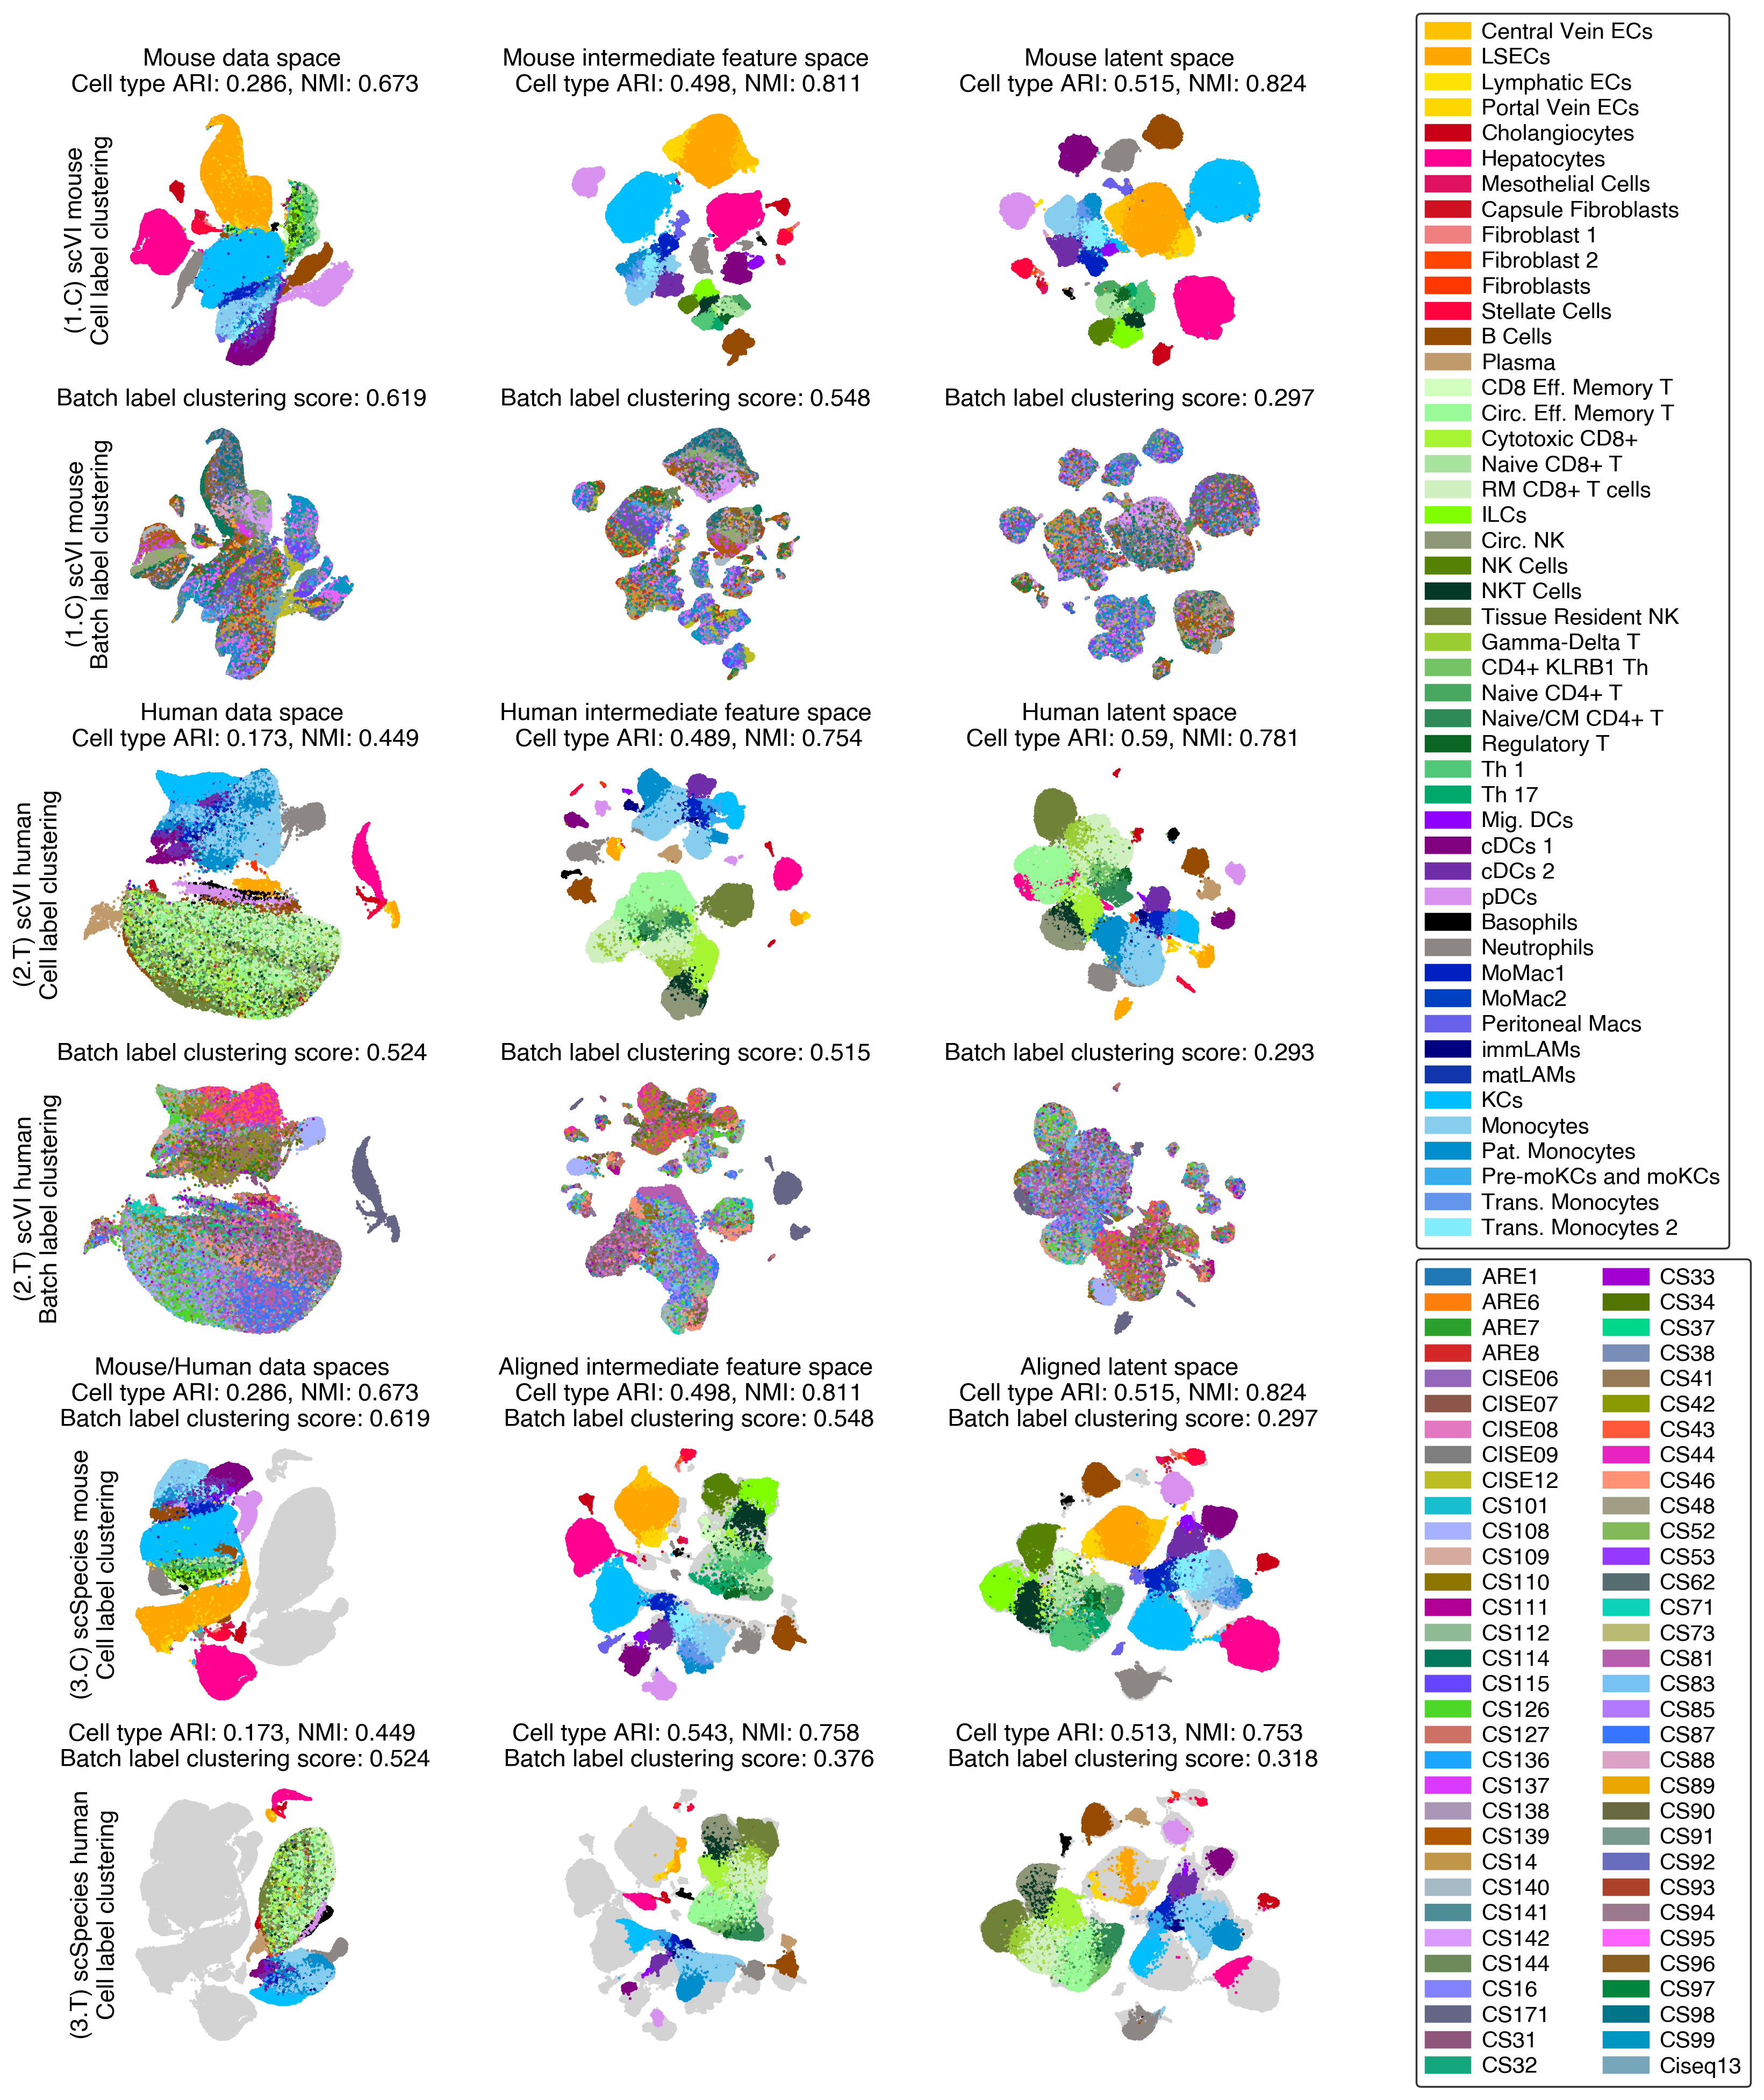

In [ ]:
plt.rcParams.update({
    'axes.titlesize': 13,     
    'axes.labelsize': 13,     
    'legend.fontsize': 12,   
})

n_obs_context = (scSpecies_aligned['mu'].obs['system'] == '1').sum()
n_obs_target = (scSpecies_aligned['mu'].obs['system'] == '0').sum()

mouse_cell_labels = np.array(scSpecies_aligned['mu'].obs['cell_type_fine'][scSpecies_aligned['mu'].obs['system'] == '1'])
human_cell_labels = np.array(scSpecies_aligned['mu'].obs['cell_type_fine'][scSpecies_aligned['mu'].obs['system'] == '0'])
mouse_batch_labels = np.array(scSpecies_interm_context['mu'].obs['batch'])
human_batch_labels = np.array(scSpecies_interm_target['mu'].obs['batch'])

ct_dict = return_palette(np.unique(list(human_cell_labels) + list(mouse_cell_labels)))
ct_dict = sorted(ct_dict.items(), key=lambda x: (x[1][1], x[1][2]) )
ct_dict = {k: (v[0], k, v[2], i + 1) for i, (k, v) in enumerate(ct_dict)}

ct_dict_batch = return_palette(np.unique(list(mouse_batch_labels) + list(human_batch_labels)))
ct_dict_human = return_palette(human_cell_labels)
ct_dict_mouse = return_palette(mouse_cell_labels)

colors_mouse = [ct_dict_mouse[ct][0] for ct in mouse_cell_labels]
colors_human = [ct_dict_human[ct][0] for ct in human_cell_labels]

colors_mouse_batch = [ct_dict_batch[ct][0] for ct in mouse_batch_labels]
colors_human_batch = [ct_dict_batch[ct][0] for ct in human_batch_labels]

perm_mouse = np.random.permutation(len(colors_mouse))#[:5000]
perm_human = np.random.permutation(len(colors_human))#[:5000]

figsize=(10,15)
dpi=250
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, len(plot_layers), figsize=figsize, constrained_layout=True, dpi=dpi, layout='constrained') 

for i,ax in enumerate(ax1):

    key = plot_layers[i]
    umap = scSpecies_interm_context[key].obsm['X_umap']
    ax.scatter(umap[perm_mouse,0], umap[perm_mouse,1], s=40000/len(colors_mouse), c=np.array(colors_mouse)[perm_mouse])
    ax.set_aspect('equal')        
    Leiden_ARI = str(round(scSpecies_interm_context[key].uns['Leiden_ARI'], 3))
    Leiden_NMI = str(round(scSpecies_interm_context[key].uns['Leiden_NMI'], 3)) 
    
    if i == 0:
        ax.set_title(f'Mouse data space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}')
        ax.set_ylabel("(1.C) scVI mouse\n Cell label clustering ")
    if i == 1:
        ax.set_title(f'Mouse intermediate feature space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}')
    if i == 2:
        ax.set_title(f'Mouse latent space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}')    
    
for i,ax in enumerate(ax2):
    
    key = plot_layers[i]
    umap = scSpecies_interm_context[key].obsm['X_umap']
    ax.scatter(umap[perm_mouse,0], umap[perm_mouse,1], s=40000/len(colors_mouse), c=np.array(colors_mouse_batch)[perm_mouse]) 
    ax.set_aspect('equal')
    Batch_SI = str(round(scSpecies_interm_context[key].uns['Shannon_batch_scaled'], 3))    
    
    if i == 0:
        ax.set_title(f'Batch label clustering score: {Batch_SI}')
        ax.set_ylabel("(1.C) scVI mouse\n Batch label clustering ")
    if i == 1:
        ax.set_title(f'Batch label clustering score: {Batch_SI}')
    if i == 2:
        ax.set_title(f'Batch label clustering score: {Batch_SI}')    
    
for i,ax in enumerate(ax3):
    key = plot_layers[i]
    umap = - scvi_interm_target[key].obsm['X_umap']
    ax.scatter(umap[perm_human,0], umap[perm_human,1], s=40000/len(colors_human), c=np.array(colors_human)[perm_human])
    ax.set_aspect('equal')
        
    Leiden_ARI = str(round(scvi_interm_target[key].uns['Leiden_ARI'], 3))
    Leiden_NMI = str(round(scvi_interm_target[key].uns['Leiden_NMI'], 3)) 
    if i == 0:
        ax.set_title(f'Human data space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}')
        ax.set_ylabel("(2.T) scVI human\n Cell label clustering ")
    if i == 1:
        ax.set_title(f'Human intermediate feature space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}')
    if i == 2:
        ax.set_title(f'Human latent space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}')       

for i,ax in enumerate(ax4):
    key = plot_layers[i]
    
    umap = - scvi_interm_target[key].obsm['X_umap']
    ax.scatter(umap[perm_human,0], umap[perm_human,1], s=40000/len(colors_human), c=np.array(colors_human_batch)[perm_human])      
    ax.set_aspect('equal')
    
    Batch_SI = str(round(scvi_interm_target[key].uns['Shannon_batch_scaled'], 3))  
    
    if i == 0:
        ax.set_title(f'Batch label clustering score: {Batch_SI}')
        ax.set_ylabel("(2.T) scVI human\n Batch label clustering ")
    if i == 1:
        ax.set_title(f'Batch label clustering score: {Batch_SI}')
    if i == 2:
        ax.set_title(f'Batch label clustering score: {Batch_SI}')       

for i,ax in enumerate(ax5):
    key = plot_layers[i]
    umap_mouse = scSpecies_aligned[key].obsm['X_umap'][:n_obs_context]
    umap_human = scSpecies_aligned[key].obsm['X_umap'][n_obs_context:n_obs_context+n_obs_target]
    
    ax.scatter(umap_human[:,0], umap_human[:,1], s=40000/len(colors_human), c='lightgray')
    ax.scatter(umap_mouse[perm_mouse,0], umap_mouse[perm_mouse,1], s=40000/len(colors_mouse), c=np.array(colors_mouse)[perm_mouse])
    ax.set_aspect('equal')
        
    Leiden_ARI = str(round(scSpecies_interm_context[key].uns['Leiden_ARI'], 3))
    Leiden_NMI = str(round(scSpecies_interm_context[key].uns['Leiden_NMI'], 3)) 
    Batch_SI = str(round(scSpecies_interm_context[key].uns['Shannon_batch_scaled'], 3))          
    
    if i == 0:
        ax.set_title(f'Mouse/Human data spaces\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}\n Batch label clustering score: {Batch_SI}')
        ax.set_ylabel("(3.C) scSpecies mouse\n Cell label clustering ")
    if i == 1:
        ax.set_title(f'Aligned intermediate feature space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}\n Batch label clustering score: {Batch_SI}')
    if i == 2:
        ax.set_title(f'Aligned latent space\n Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}\n Batch label clustering score: {Batch_SI}')   

for i,ax in enumerate(ax6):
    key = plot_layers[i]    

    umap_mouse = scSpecies_aligned[key].obsm['X_umap'][:n_obs_context]
    umap_human = scSpecies_aligned[key].obsm['X_umap'][n_obs_context:n_obs_context+n_obs_target]
    
    ax.scatter(umap_mouse[:,0], umap_mouse[:,1], s=40000/len(colors_mouse), c='lightgray')
    ax.scatter(umap_human[perm_human,0], umap_human[perm_human,1], s=40000/len(colors_human), c=np.array(colors_human)[perm_human])
    ax.set_aspect('equal')    
    Leiden_ARI = str(round(scSpecies_interm_target[key].uns['Leiden_ARI'], 3))
    Leiden_NMI = str(round(scSpecies_interm_target[key].uns['Leiden_NMI'], 3)) 
    Batch_SI = str(round(scSpecies_interm_target[key].uns['Shannon_batch_scaled'], 3))    
    
    if i == 0:
        ax.set_title(f'Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}\n Batch label clustering score: {Batch_SI}')
        ax.set_ylabel("(3.T) scSpecies human\n Cell label clustering ")
    if i == 1:
        ax.set_title(f'Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}\n Batch label clustering score: {Batch_SI}')
    if i == 2:
        ax.set_title(f'Cell type ARI: {Leiden_ARI}, NMI: {Leiden_NMI}\n Batch label clustering score: {Batch_SI}')   

for axs in [ax1, ax2, ax3, ax4, ax5, ax6]:
    for i, ax in enumerate(axs):
        
        ax.set_xticks([])
        ax.set_yticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)        
    
legend = fig.legend(handles=[mpatches.Patch(color=ct_dict[label][0], 
                    label=ct_dict[label][1]) for label in list(ct_dict.keys())], 
                    loc='upper left', 
                    bbox_to_anchor=(1.04, 1.02), 
                    labelspacing=0.20, 
                    handlelength=2, 
                    handletextpad=0.5, 
                    markerscale=2
                    )

legend.get_frame().set_linewidth(1)  
legend.get_frame().set_edgecolor('black')           

legend_batch = fig.legend(handles=[mpatches.Patch(color=color[0], label=label) for label, color in ct_dict_batch.items()], 
                    loc='lower left', 
                    bbox_to_anchor=(1.04, -0.02), 
                    labelspacing=0.20, 
                    handlelength=2, 
                    handletextpad=0.5, 
                    markerscale=2,
                    ncol=2
)

legend_batch.get_frame().set_linewidth(1)  
legend_batch.get_frame().set_edgecolor('black')    
fig.align_ylabels([*ax1, *ax2, *ax3, *ax4, *ax5, *ax6])
plt.savefig("/Users/cschaech/Desktop/aligned_spaces.png", bbox_inches='tight')

In [ ]:
adata = ad.AnnData(np.concat((scSpecies_model.mdata.mod['mouse'].obsm['latent_mu'], scSpecies_model.mdata.mod['human'].obsm['latent_mu'])))
adata.obs['system'] = np.array(['mouse'] * scSpecies_model.mdata.mod['mouse'].n_obs + ['human'] * scSpecies_model.mdata.mod['human'].n_obs)
adata.obs['cell_type_fine'] = np.concat((scSpecies_model.mdata.mod['mouse'].obs['cell_type_fine'], scSpecies_model.mdata.mod['human'].obs['cell_type_fine']))

sc.pp.neighbors(adata, use_rep="X")
sc.tl.umap(adata, random_state=1234)

n_obs_context = (adata.obs['system'] == 'mouse').sum()
n_obs_target = (adata.obs['system'] == 'human').sum()
umap_mouse = adata.obsm['X_umap'][:n_obs_context]
umap_human = adata.obsm['X_umap'][n_obs_context:n_obs_context+n_obs_target]

mouse_cell_labels = np.array(adata.obs['cell_type_fine'][adata.obs['system'] == 'mouse'])
human_cell_labels = np.array(adata.obs['cell_type_fine'][adata.obs['system'] == 'human'])

figsize=(12.25,6)
dpi=250
fig, (ax_A, ax_B) = plt.subplots(1, 2, figsize=figsize, constrained_layout=True, dpi=dpi, layout='constrained') 

ct_dict_human = return_palette(human_cell_labels)
ct_dict_mouse = return_palette(mouse_cell_labels)

colors_mouse = [ct_dict_mouse[ct][0] for ct in mouse_cell_labels]
colors_human = [ct_dict_human[ct][0] for ct in human_cell_labels]

perm_mouse = np.random.permutation(len(colors_mouse))
perm_human = np.random.permutation(len(colors_human))

ax_B.scatter(umap_mouse[:,0], umap_mouse[:,1], s=40000/len(colors_mouse), c='lightgray')
ax_A.scatter(umap_human[:,0], umap_human[:,1], s=40000/len(colors_human), c='lightgray')

ax_A.scatter(umap_mouse[perm_mouse,0], umap_mouse[perm_mouse,1], s=40000/len(colors_mouse), c=np.array(colors_mouse)[perm_mouse])
ax_B.scatter(umap_human[perm_human,0], umap_human[perm_human,1], s=40000/len(colors_human), c=np.array(colors_human)[perm_human])

ax_B.set_xlim(np.min(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04, np.max(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04)
ax_B.set_ylim(np.min(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04, np.max(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04)

ax_A.set_xlim(np.min(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04, np.max(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04)
ax_A.set_ylim(np.min(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04, np.max(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04)

ax_A.set_xticks([])
ax_A.set_yticks([])
ax_B.set_xticks([])
ax_B.set_yticks([])

ax_A.spines['top'].set_visible(False)
ax_A.spines['right'].set_visible(False)
ax_A.spines['bottom'].set_visible(False)
ax_A.spines['left'].set_visible(False)

ax_B.spines['top'].set_visible(False)
ax_B.spines['right'].set_visible(False)
ax_B.spines['bottom'].set_visible(False)
ax_B.spines['left'].set_visible(False)

In [3]:
device = "mps"
h_dict = {'k_neigh': 25,  'alignment': 'inter',  'top_percent': 20}

dataset = "glio"#"liver"
context_key = 'mouse'
target_key = 'human'

set_random_seed(1234)

mdata = mu.read_h5mu(data_path+dataset+".h5mu")

scSpecies_model = scSpecies(device, 
                mdata,
                data_path,
                context_dataset_key = context_key, 
                target_dataset_key = target_key,       
                random_seed = 1234,
                use_lib_enc = True,
                **h_dict
                )

scSpecies_model.train_context(40, save_model=False)
scSpecies_model.eval_context()

scSpecies_model.train_target(40, track_prototypes=False, save_model=False)
scSpecies_model.eval_target()

scSpecies_model.get_representation('context') 
scSpecies_model.get_representation('target') 


Evaluating data level NNS for context label key cell_type_fine.

Calculating cells with the highest agreement.

Initializing context scVI model.

Initializing target scVI model.

Pretraining on the context dataset for 40 epochs (= 14440 iterations).
Calculate context intermediate and latent variables. Step 265/362     Epoch: 40 - Iteration: 14436 - ms/Iteration: 21.13 - nELBO: 1756.5 (-0.166) - nlog_likeli: 1736.1 (-0.174) - KL-Div z: 17.483 (+0.018) - KL-Div l: 2.9447 (-0.009).           
Training on the target dataset for 40 epochs (= 18280 iterations).
Calculate target latent variables. Step 291/458      0:00:00 - Epoch: 40 - Iteration: 18268 - ms/Iteration: 38.77 - nELBO: 1934.8 (+0.864) - nlog_likeli: 1775.7 (-0.391) - KL-Div z: 16.016 (+0.007) - KL-Div l: 2.8942 (-0.010).           

In [ ]:
adata = ad.AnnData(np.concat((scSpecies_model.mdata.mod['mouse'].obsm['latent_mu'], scSpecies_model.mdata.mod['human'].obsm['latent_mu'])))
adata.obs['system'] = np.array(['mouse'] * scSpecies_model.mdata.mod['mouse'].n_obs + ['human'] * scSpecies_model.mdata.mod['human'].n_obs)
adata.obs['cell_type_fine'] = np.concat((scSpecies_model.mdata.mod['mouse'].obs['cell_type_fine'], scSpecies_model.mdata.mod['human'].obs['cell_type_fine']))

sc.pp.neighbors(adata, use_rep="X")
sc.tl.umap(adata, random_state=1234)

n_obs_context = (adata.obs['system'] == 'mouse').sum()
n_obs_target = (adata.obs['system'] == 'human').sum()
umap_mouse = adata.obsm['X_umap'][:n_obs_context]
umap_human = adata.obsm['X_umap'][n_obs_context:n_obs_context+n_obs_target]

mouse_cell_labels = np.array(adata.obs['cell_type_fine'][adata.obs['system'] == 'mouse'])
human_cell_labels = np.array(adata.obs['cell_type_fine'][adata.obs['system'] == 'human'])

figsize=(12.25,6)
dpi=250
fig, (ax_A, ax_B) = plt.subplots(1, 2, figsize=figsize, constrained_layout=True, dpi=dpi, layout='constrained') 

ct_dict_human = return_palette(human_cell_labels)
ct_dict_mouse = return_palette(mouse_cell_labels)

colors_mouse = [ct_dict_mouse[ct][0] for ct in mouse_cell_labels]
colors_human = [ct_dict_human[ct][0] for ct in human_cell_labels]

perm_mouse = np.random.permutation(len(colors_mouse))
perm_human = np.random.permutation(len(colors_human))

ax_B.scatter(umap_mouse[:,0], umap_mouse[:,1], s=40000/len(colors_mouse), c='lightgray')
ax_A.scatter(umap_human[:,0], umap_human[:,1], s=40000/len(colors_human), c='lightgray')

ax_A.scatter(umap_mouse[perm_mouse,0], umap_mouse[perm_mouse,1], s=40000/len(colors_mouse), c=np.array(colors_mouse)[perm_mouse])
ax_B.scatter(umap_human[perm_human,0], umap_human[perm_human,1], s=40000/len(colors_human), c=np.array(colors_human)[perm_human])

ax_B.set_xlim(np.min(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04, np.max(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04)
ax_B.set_ylim(np.min(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04, np.max(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04)

ax_A.set_xlim(np.min(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04, np.max(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04)
ax_A.set_ylim(np.min(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04, np.max(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04)

ax_A.set_xticks([])
ax_A.set_yticks([])
ax_B.set_xticks([])
ax_B.set_yticks([])

ax_A.spines['top'].set_visible(False)
ax_A.spines['right'].set_visible(False)
ax_A.spines['bottom'].set_visible(False)
ax_A.spines['left'].set_visible(False)

ax_B.spines['top'].set_visible(False)
ax_B.spines['right'].set_visible(False)
ax_B.spines['bottom'].set_visible(False)
ax_B.spines['left'].set_visible(False)

In [ ]:
device = "mps"
h_dict = {'k_neigh': 25,  'alignment': 'inter',  'top_percent': 20}

dataset = "adipose"#"liver"
context_key = 'mouse'
target_key = 'human'

set_random_seed(1234)

mdata = mu.read_h5mu(data_path+dataset+".h5mu")

scSpecies_model = scSpecies(device, 
                mdata,
                data_path,
                context_dataset_key = context_key, 
                target_dataset_key = target_key,       
                random_seed = 1234,
                use_lib_enc = True,
                **h_dict
                )

scSpecies_model.train_context(40, save_model=False)
scSpecies_model.eval_context()

scSpecies_model.train_target(40, track_prototypes=False, save_model=False)
scSpecies_model.eval_target()

scSpecies_model.get_representation('context') 
scSpecies_model.get_representation('target') 

In [ ]:
adata = ad.AnnData(np.concat((scSpecies_model.mdata.mod['mouse'].obsm['latent_mu'], scSpecies_model.mdata.mod['human'].obsm['latent_mu'])))
adata.obs['system'] = np.array(['mouse'] * scSpecies_model.mdata.mod['mouse'].n_obs + ['human'] * scSpecies_model.mdata.mod['human'].n_obs)
adata.obs['cell_type_fine'] = np.concat((scSpecies_model.mdata.mod['mouse'].obs['cell_type_fine'], scSpecies_model.mdata.mod['human'].obs['cell_type_fine']))

sc.pp.neighbors(adata, use_rep="X")
sc.tl.umap(adata, random_state=1234)

n_obs_context = (adata.obs['system'] == 'mouse').sum()
n_obs_target = (adata.obs['system'] == 'human').sum()
umap_mouse = adata.obsm['X_umap'][:n_obs_context]
umap_human = adata.obsm['X_umap'][n_obs_context:n_obs_context+n_obs_target]

mouse_cell_labels = np.array(adata.obs['cell_type_fine'][adata.obs['system'] == 'mouse'])
human_cell_labels = np.array(adata.obs['cell_type_fine'][adata.obs['system'] == 'human'])

figsize=(12.25,6)
dpi=250
fig, (ax_A, ax_B) = plt.subplots(1, 2, figsize=figsize, constrained_layout=True, dpi=dpi, layout='constrained') 

ct_dict_human = return_palette(human_cell_labels)
ct_dict_mouse = return_palette(mouse_cell_labels)

colors_mouse = [ct_dict_mouse[ct][0] for ct in mouse_cell_labels]
colors_human = [ct_dict_human[ct][0] for ct in human_cell_labels]

perm_mouse = np.random.permutation(len(colors_mouse))
perm_human = np.random.permutation(len(colors_human))

ax_B.scatter(umap_mouse[:,0], umap_mouse[:,1], s=40000/len(colors_mouse), c='lightgray')
ax_A.scatter(umap_human[:,0], umap_human[:,1], s=40000/len(colors_human), c='lightgray')

ax_A.scatter(umap_mouse[perm_mouse,0], umap_mouse[perm_mouse,1], s=40000/len(colors_mouse), c=np.array(colors_mouse)[perm_mouse])
ax_B.scatter(umap_human[perm_human,0], umap_human[perm_human,1], s=40000/len(colors_human), c=np.array(colors_human)[perm_human])

ax_B.set_xlim(np.min(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04, np.max(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04)
ax_B.set_ylim(np.min(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04, np.max(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04)

ax_A.set_xlim(np.min(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04, np.max(np.concatenate((umap_mouse[:, 0], umap_human[:, 0])))*1.04)
ax_A.set_ylim(np.min(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04, np.max(np.concatenate((umap_mouse[:, 1], umap_human[:, 1])))*1.04)

ax_A.set_xticks([])
ax_A.set_yticks([])
ax_B.set_xticks([])
ax_B.set_yticks([])

ax_A.spines['top'].set_visible(False)
ax_A.spines['right'].set_visible(False)
ax_A.spines['bottom'].set_visible(False)
ax_A.spines['left'].set_visible(False)

ax_B.spines['top'].set_visible(False)
ax_B.spines['right'].set_visible(False)
ax_B.spines['bottom'].set_visible(False)
ax_B.spines['left'].set_visible(False)